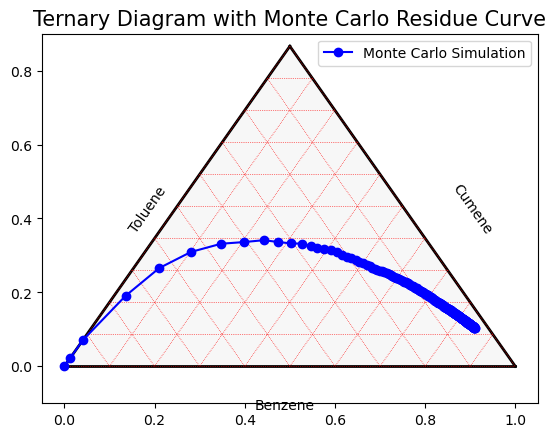

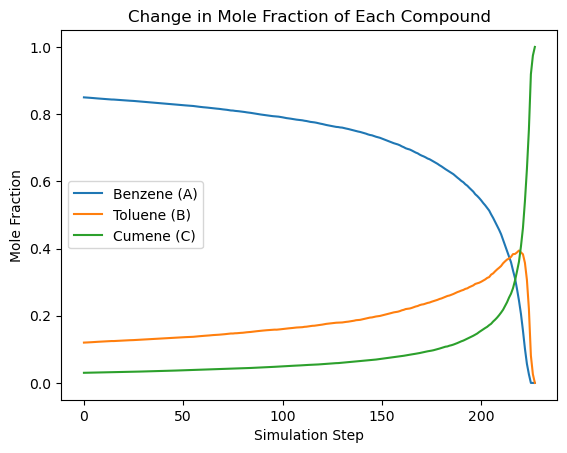

In [12]:
!pip install matplotlib python-ternary
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import ternary

def montecarlo(N1, alphaA, alphaB, alphaC, m, n):
    A = N1[0]
    B = N1[1]
    C = N1[2]
    points = []

    for i in range(m):
        for j in range(n):
            total = A + B + C
            if total == 0:
                break
            pA = alphaA * A / total
            pB = alphaB * B / total
            pC = alphaC * C / total
            max_p = max(pA, pB, pC)

            if pA / max_p >= rnd.random():
                A -= 1
            if pB / max_p >= rnd.random():
                B -= 1
            if pC / max_p >= rnd.random():
                C -= 1

            A = max(0, A)
            B = max(0, B)
            C = max(0, C)

        total = A + B + C
        if total > 0:
            points.append([A / total, B / total, C / total])

    return points

# Constants and Initial Setup
alphaA = 2.4
alphaB = 1
alphaC = 0.21
N = 10000
x1 = np.array([0.85, 0.12, 0.03])
N1 = x1 * N
m = 10000
n = 38

# Run the Monte Carlo simulation
montecarlo_points = montecarlo(N1, alphaA, alphaB, alphaC, m, n)

# Plotting the ternary diagram with Monte Carlo residue curves 
figure, tax = ternary.figure(scale=1.0)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=0.1, color="red")

# Ticks and labels
fontsize = 10
tax.left_axis_label("Toluene", fontsize=fontsize)
tax.right_axis_label("Cumene", fontsize=fontsize, offset=0.16)
tax.bottom_axis_label("Benzene", fontsize=fontsize, offset=0.04)

# Plotting the residue curves
tax.plot(montecarlo_points, label="Monte Carlo Simulation", linestyle='-', marker='o', color='blue')

# Title and legend
tax.set_title("Ternary Diagram with Monte Carlo Residue Curve", fontsize=15)
tax.legend()

# Save and show plot
plt.show()

def plot_mole_fraction_changes(points):
    points = np.array(points)
    steps = np.arange(len(points))

    plt.figure()
    plt.plot(steps, points[:, 0], label='Benzene (A)')
    plt.plot(steps, points[:, 1], label='Toluene (B)')
    plt.plot(steps, points[:, 2], label='Cumene (C)')
    plt.xlabel('Simulation Step')
    plt.ylabel('Mole Fraction')
    plt.title('Change in Mole Fraction of Each Compound')
    plt.legend()
    plt.show()

plot_mole_fraction_changes(montecarlo_points)
